# Price Bucket Prediction

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
def pre(total_pop):
    temp=[]
    for i in total_pop:
        k=str(i).split(',')
        x=""
        for j in k:
            x+=j
        temp.append(int(x))
    return temp

## Data loading

In [235]:
df=pd.read_csv("district_wise_pop.csv")
df2=pd.read_csv("per _capital_distict.csv")

In [236]:
df.head()

,No.,Name of District,Pop
0,1,Agra,"4,418,800"
1,2,Aligarh,"3,690,388"
2,3,PrayagRaj,"5,959,798"
3,4,Ambedkar Nagar,"2,025,376"
4,5,Amroha,"1,499,193"


In [237]:
df2.head()

,S. No,Name of District,2004 to 2005 (In Rupees),2005 to 2006 (In Rupees),2006 to 2007 (In Rupees),2007 to 2008 (In Rupees),2008 to 2009 (In Rupees),2009 to 2010 (In Rupees),2010 to 2011 (In Rupees),base,PerCapita
0,1,Agra,16746,17992,19696,21634,26361,28620,32249,36645,42758
1,2,Aligarh,11049,11994,13469,14890,18218,19906,23259,27424,31728
2,3,PrayagRaj,10063,11472,12270,13839,18206,20572,22513,25987,31516
3,4,Ambedkar Nagar,12565,13452,14524,15478,16858,16968,17858,18654,19875
4,5,Amroha,13021,14659,16152,17593,21993,25386,28673,33862,43082


In [238]:
total=pre(df["Pop"].values)

In [239]:
per_capita=df2["PerCapita"].values


## Commodity Data and its Preprocessing

In [240]:
df=pd.read_csv("flipkart_com-ecommerce_sample.csv")


In [241]:
uid=df["uniq_id"].values
p_name=df["product_name"].values
price=df["retail_price"].values
d_price=df["discounted_price"].values
brand=df["brand"].values


In [242]:
import math
brand1=[]
for i in range(len(brand)):
    k=p_name[i].split()
    try: 
        if(math.isnan(brand[i])):
            brand1.append(k[0])
    except:
        brand1.append(brand[i])

In [243]:
csv=pd.DataFrame({"uniq_id":uid,"product_name":p_name,"retail_price":price,"discounted_price":d_price,"brand":brand1})

In [244]:
csv.to_csv("dataset.csv")

In [245]:
csv["retail_price"]=csv["retail_price"].fillna(csv["retail_price"].median())

In [246]:
csv["discounted_price"]=csv["discounted_price"].fillna(csv["discounted_price"].median())

In [247]:
csv.to_csv("dataset.csv")

In [248]:
discounted_price=csv["discounted_price"].values
retail_price=csv["retail_price"].values
uid=csv["uniq_id"].values

In [249]:
"""input_vector=[]
for i in range(0,int(len(uid)//2)):
    l=[]
    for j in range(len(total)):
        l.append([[retail_price[i]],[total[j]],[per_capita[j]]])
    input_vector.append(l)
test_input_vector=[]
for i in range(len(uid)//2,len(uid)):
    l=[]
    for j in range(len(total)):
        l.append([[retail_price[i]],[total[j]],[per_capita[j]]])
    test_input_vector.append(l)
"""
input_vector=[]
for i in range(0,len(uid)):
    for j in range(len(total)):
        input_vector.append([retail_price[i],total[j],per_capita[j]])
len(input_vector[0])


3

In [250]:
label=[]
for i in range(len(discounted_price)):
    label.append(discounted_price[i])
label

[379.0,
 22646.0,
 499.0,
 267.0,
 210.0,
 430.0,
 479.0,
 22646.0,
 349.0,
 479.0,
 950.0,
 910.0,
 550.0,
 379.0,
 699.0,
 379.0,
 22646.0,
 449.0,
 999.0,
 22646.0,
 100.0,
 550.0,
 1039.0,
 1500.0,
 190.0,
 699.0,
 2499.0,
 390.0,
 309.0,
 1699.0,
 579.0,
 699.0,
 275.0,
 275.0,
 837.0,
 699.0,
 298.0,
 899.0,
 399.0,
 764.0,
 1349.0,
 1499.0,
 1899.0,
 1400.0,
 499.0,
 449.0,
 1049.0,
 5000.0,
 4990.0,
 599.0,
 449.0,
 899.0,
 4990.0,
 449.0,
 6600.0,
 449.0,
 449.0,
 599.0,
 550.0,
 699.0,
 499.0,
 849.0,
 599.0,
 449.0,
 449.0,
 924.0,
 499.0,
 395.0,
 795.0,
 250.0,
 695.0,
 899.0,
 1393.0,
 230.0,
 449.0,
 395.0,
 550.0,
 1299.0,
 380.0,
 899.0,
 698.0,
 650.0,
 698.0,
 499.0,
 1200.0,
 949.0,
 590.0,
 599.0,
 15195.0,
 1995.0,
 13099.0,
 1223.0,
 24400.0,
 595.0,
 449.0,
 2599.0,
 2250.0,
 849.0,
 719.0,
 1202.0,
 399.0,
 999.0,
 2099.0,
 399.0,
 2795.0,
 1249.0,
 4995.0,
 2299.0,
 107750.0,
 3146.0,
 1270.0,
 1817.0,
 1919.0,
 3221.0,
 429.0,
 3995.0,
 571230.0,
 899.0,
 499

# Multi-layer Perceptron regressor

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function  by training on a dataset, where  is the number of dimensions for input and  is the number of dimensions for output. Given a set of features  and a target , it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure 1 shows a one hidden layer MLP with scalar output.

In [251]:
from sklearn.neural_network import MLPRegressor

In [252]:
clf = MLPRegressor(solver='adam', alpha=0.0001,hidden_layer_sizes=(5, 3), random_state=0, learning_rate="adaptive", learning_rate_init=0.05,activation="relu")

In [253]:
clf.fit(input_vector[0:len(label)//2],label[0:len(label)//2])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 3), learning_rate='adaptive',
       learning_rate_init=0.05, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [254]:
k=clf.predict(input_vector[:10000])

## Multi-layer Perceptron regressor score

In [255]:
network_score=clf.score(input_vector[10000:10100],label[10000:10100])
network_score=network_score**2
network_score

28.911165975183788

In [256]:
k=clf.predict(input_vector[:1000])

# Model Evaluation Analysis

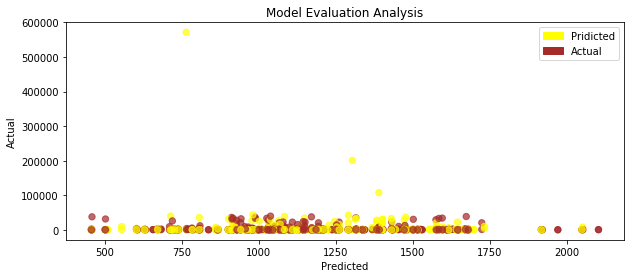

In [257]:
plt.figure(figsize=(10,4))
plt.scatter(k,label[:1000], c=["yellow","brown"],s=40, alpha=0.7)
popA=mpatches.Patch(color="yellow",label="Pridicted")
popB=mpatches.Patch(color="brown",label="Actual")
plt.legend(handles=[popA,popB])
plt.title("Model Evaluation Analysis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Model.jpg")
plt.show()

# Exploratory Data Analysis

In [290]:
x=csv["product_name"].values


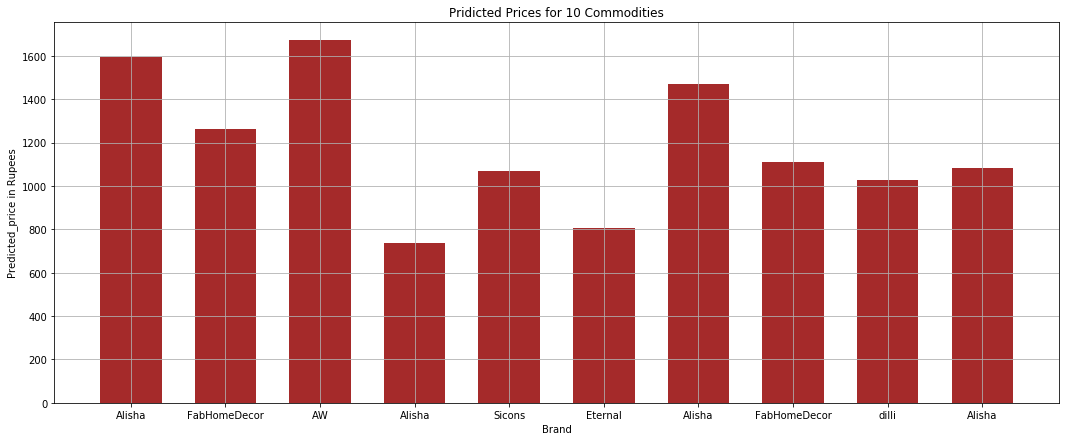

In [259]:
X=[i.split()[0] for i in x[0:10]]
Y=k[0:10]
x_pos=[i for i,_ in enumerate(X)]
plt.figure(figsize=(18,7))
plt.bar(x_pos,Y,color='brown',width=0.65)
plt.grid(True)
plt.title("Pridicted Prices for 10 Commodities")
plt.xlabel('Brand')
plt.ylabel('Predicted_price in Rupees')
plt.xticks(x_pos,X)
plt.savefig("bar.jpg")
plt.show()

# Data Evaluation

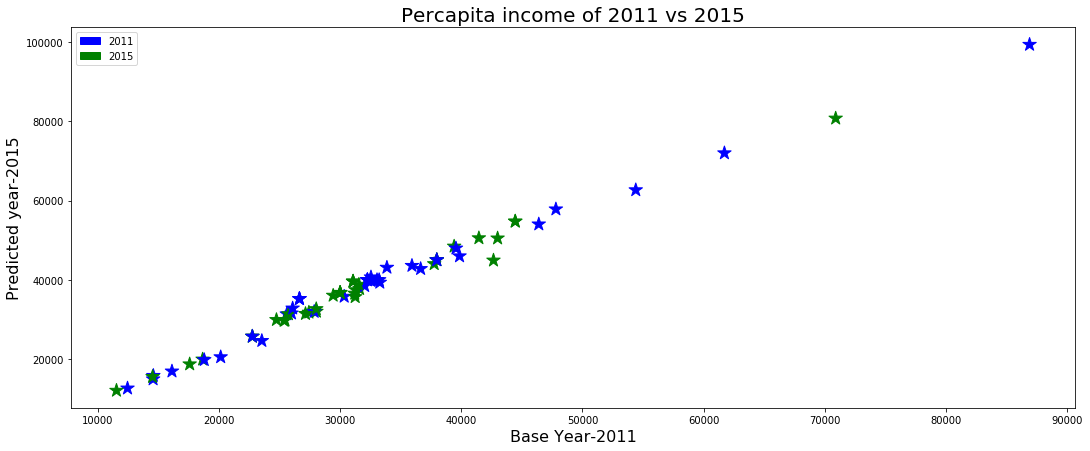

In [260]:
df1=pd.read_csv("per _capital_distict.csv")
import matplotlib.patches as mpatches
base=df1["base"].values
perCap=df1["PerCapita"].values
plt.figure(figsize=(18,7))
plt.scatter(base, perCap, s=200,marker='*', color=['blue','green'])
popA=mpatches.Patch(color="blue",label="2011")
popB=mpatches.Patch(color="green",label="2015")
plt.legend(handles=[popA,popB])
plt.xlabel('Base Year-2011', fontsize=16)
plt.ylabel('Predicted year-2015', fontsize=16)
plt.title('Percapita income of 2011 vs 2015',fontsize=20)
plt.savefig("a.jpg")
plt.show()

# Linear Regression Model

In [273]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(input_vector[:10000],label[:10000])
k1=reg.predict(input_vector[0:10000])
#k1

## Linear Regression Score

In [272]:
linear_score=reg.score(input_vector[10000:10100],label[10000:10100])
linear_score=(linear_score**2)
linear_score

39.414431012297321

# Support Vector Machine

In [280]:
from sklearn import svm
clf_svm=svm.SVR()
clf_svm.fit(input_vector[:10000],label[:10000])
k3=clf_svm.predict(input_vector[10000:10100])

## Support Vector Machine Score

In [289]:
svmScore=clf_svm.score(input_vector[10000:10100],label[10000:10100])
svm_score=(svmScore**2)
svm_score

0.0001226453482842774

## Score comparision of models

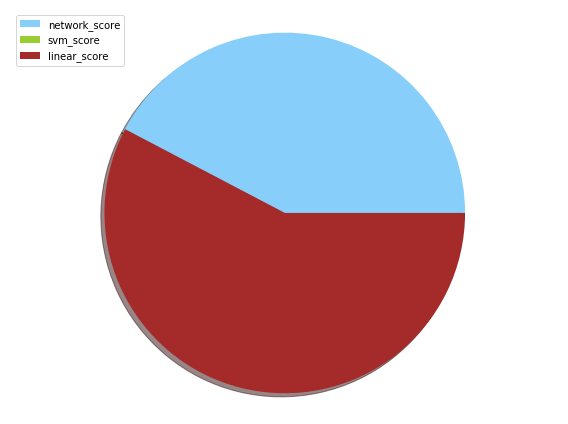

In [286]:
cc=[network_score,svm_score,linear_score]
name=["network_score","svm_score","linear_score"]
colors=["lightskyblue","yellowgreen","brown",]
plt.figure(figsize=(8,6))
patches, texts=plt.pie(cc,colors=colors, shadow=True, startangle=0)
plt.legend(patches, name,loc="best")
plt.axis("equal")
plt.tight_layout()
plt.savefig("compare.jpg")
plt.show()

In [264]:
bucket=clf.predict(input_vector[10000:])

## Bucket Price range 

In [270]:
print(" uid                                                   bucket                   discount")
for i in range(len(retail_price)):
    if(i<10000):
        print(str(uid[i])+str("                [")+str(retail_price[i])+","+str(k[i])+str("]          ")+str(abs(retail_price[i]-k[i])*100/retail_price[i]) )
    else:
        print(str(uid[i])+str("                [")+str(retail_price[i])+","+str(bucket[i])+str("]      ")+str(abs(retail_price[i]-bucket[i])*100/retail_price[i]) )

 uid                                                   bucket                   discount
c2d766ca982eca8304150849735ffef9                [999.0,1596.45685188]          59.8054906791
7f7036a6d550aaa89d34c77bd39a5e48                [32157.0,1260.35201766]          96.080629357
f449ec65dcbc041b6ae5e6a32717d01b                [999.0,1671.04918756]          67.2721909468
0973b37acd0c664e3de26e97e5571454                [699.0,737.990237819]          5.57800254918
bc940ea42ee6bef5ac7cea3fb5cfbee7                [220.0,1069.03651446]          385.925688391
c2a17313954882c1dba461863e98adf2                [430.0,806.016983582]          87.4458101354
ce5a6818f7707e2cb61fdcdbba61f5ad                [1199.0,1471.99124277]          22.7682437674
8542703ca9e6ebdf6d742638dfb1f2ca                [32157.0,1108.73550864]          96.552117708
29c8d290caa451f97b1c32df64477a2c                [699.0,1025.24686303]          46.6733709634
4044c0ac52c1ee4b28777417651faf42                [1199.0,1082.75275363] 

IndexError: index 1000 is out of bounds for axis 0 with size 1000